# Pymaceuticals Inc.
---

### Analysis

- This analysis of Pymaceuticals data includes the following:
    * A Summary Statistics table displaying statistical data for each type of drug regimen.
    * A Bar Chart showing number of mice per drug regimen
    * A Pie Chart comparing number of male and female mice
    * A Box Plot indicating the final tumor volumes for the top four drug regimens
    * A line graph of a single mouse's tumor volume over the course of the Capomulin treament
    * A scatter plot of mouse weight vs average tumor volume 

### Conclusion
    Capomulin and Ramicane had the lowest tumor volumes at the end of the program, which indicates that these two regimens were most effective.  Statistically, all the data correlated correctly with minimal outliers, so the experiment was run well and the results should be considered fairly accurate.     
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].count()
mouse_count

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
mouse_dup

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study.loc[mouse_study["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_C = mouse_study[mouse_study["Mouse ID"] != "g989"]
mouse_study_C.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_C["Mouse ID"].value_counts())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
group_mean = mouse_study_C["Tumor Volume (mm3)"].groupby(mouse_study_C["Drug Regimen"]).mean()
group_median = mouse_study_C["Tumor Volume (mm3)"].groupby(mouse_study_C["Drug Regimen"]).mean()
group_var = mouse_study_C["Tumor Volume (mm3)"].groupby(mouse_study_C["Drug Regimen"]).var()
group_std = mouse_study_C["Tumor Volume (mm3)"].groupby(mouse_study_C["Drug Regimen"]).std()
group_sem = mouse_study_C["Tumor Volume (mm3)"].groupby(mouse_study_C["Drug Regimen"]).sem ()

group_summary = pd.DataFrame({"Mean Tumor Volume" : group_mean, "Median Tumor Volume": group_median, \
                             "Tumor Volume Variance": group_var, "Tumor Volume Std. Dev.": group_std,\
                             "Tumor Volume Std. Err.": group_sem})
group_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_C.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

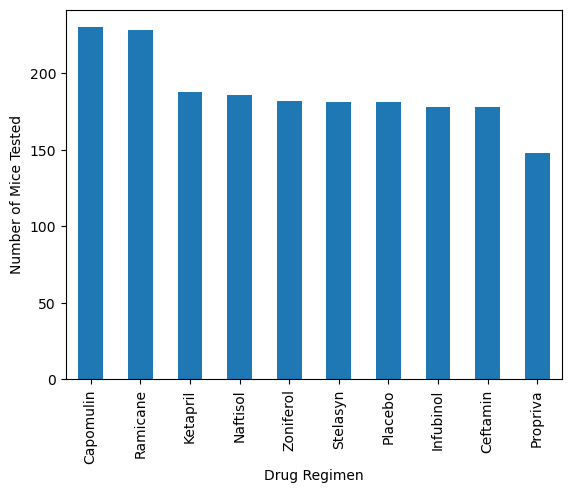

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_study_C["Drug Regimen"].value_counts().plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

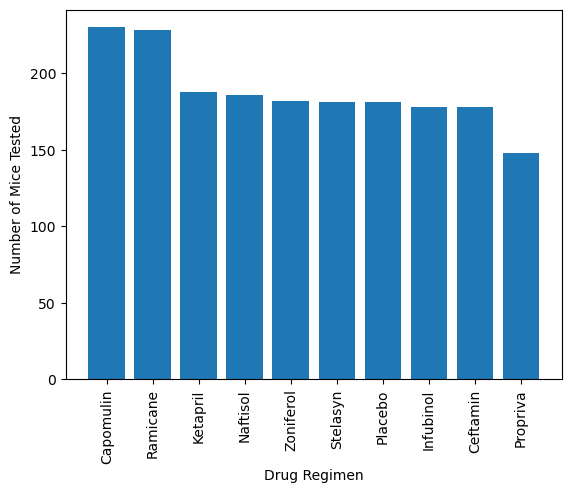

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_C["Drug Regimen"].value_counts().index.values
plt.bar(x_axis, mouse_study_C["Drug Regimen"].value_counts(), align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

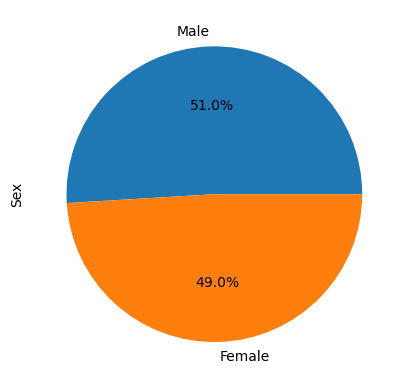

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_C["Sex"].value_counts().plot.pie(autopct= "%1.1f%%")
plt.show()

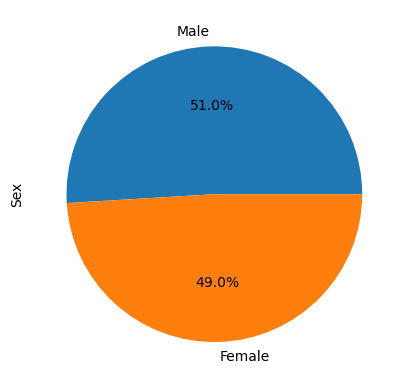

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(mouse_study_C["Sex"].value_counts(),labels=labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tv = mouse_study_C.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_results_df = pd.merge(final_tv, mouse_study_C, on=("Mouse ID","Timepoint"),how="left").reset_index()

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = [[] for i in range(4)]
for i in range(248):
    reg = final_results_df.iloc[i,:]["Drug Regimen"]
    vol = final_results_df.iloc[i,:]["Tumor Volume (mm3)"]
    for j in range(4):
        if reg==treatments[j]:
            tum_vol[j].append(vol)
            continue
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
   
    # Determine outliers using upper and lower bounds
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(248)]

for n,treatment in enumerate(treatments):
    quartiles[n] = final_results_df.loc[final_results_df["Drug Regimen"]==treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[n] = quartiles[n][0.25]
    upperq[n] = quartiles[n][0.75]
    iqr[n] = upperq[n]-lowerq[n]

    lower_bound[n] = lowerq[n] - (1.5*iqr[n])
    upper_bound[n] = upperq[n] + (1.5*iqr[n])
    
    for tum in tum_vol[n]:
        if tum > upper_bound[n] or tum < lower_bound[n]:
            potential_outliers[n].append(tum)
    # print(f"{treatment}'s potential outliers are: {potential_outliers}")
    if len(potential_outliers[n]) > 0:
        print(f"{treatment}'s potential outliers are: {potential_outliers[n]}")
    else:
        print(f"No potential outliers for {treatment}.")

No potential outliers for Capomulin.
No potential outliers for Ramicane.
Infubinol's potential outliers are: [36.3213458]
No potential outliers for Ceftamin.


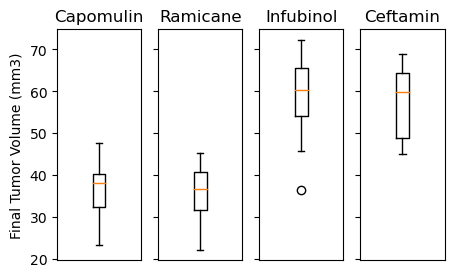

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(5,3))

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title(treatments[0])
ax1.boxplot(tum_vol[0])
ax1.set_xticks([])

ax2.set_title(treatments[1])
ax2.boxplot(tum_vol[1])
ax2.set_xticks([])

ax3.set_title(treatments[2])
ax3.boxplot(tum_vol[2])
ax3.set_xticks([])

ax4.set_title(treatments[3])
ax4.boxplot(tum_vol[3])
ax4.set_xticks([])

plt.show()


## Line and Scatter Plots

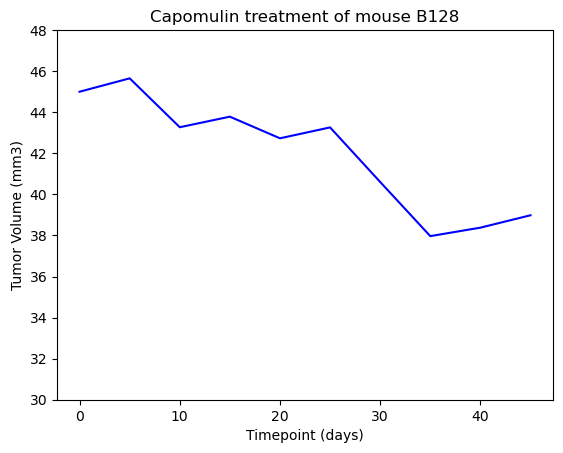

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse=mouse_study_C.loc[mouse_study_C["Mouse ID"]=='b128',:]
x_axis=cap_mouse["Timepoint"].count()
plt.plot(cap_mouse["Timepoint"],cap_mouse["Tumor Volume (mm3)"],marker=None,color="b")
plt.title("Capomulin treatment of mouse B128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,48)
plt.show()


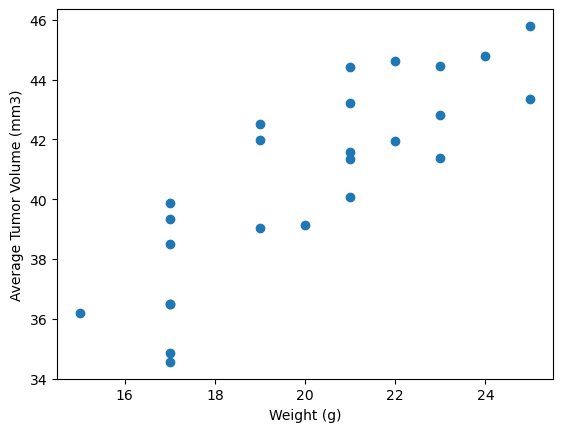

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_study_cap = mouse_study_C.loc[mouse_study_C["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor = mouse_study_cap["Tumor Volume (mm3)"].mean()
mouse_w = mouse_study_cap["Weight (g)"].unique()
plt.scatter(mouse_w, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between weight and avg tumor is 0.84


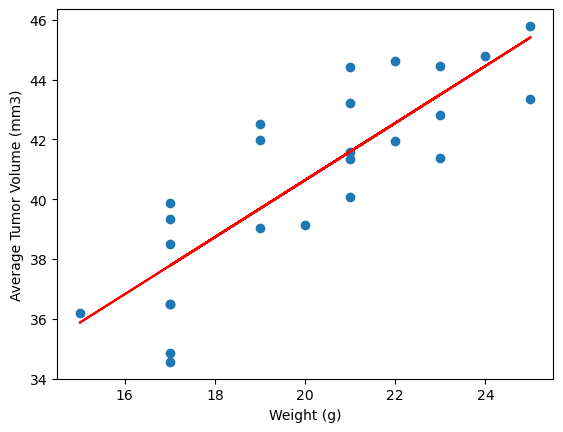

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and avg tumor is {round(st.pearsonr(mouse_w.astype(float),avg_tumor)[0],2)}")
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_w.astype(float), avg_tumor)
regress_values = mouse_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_w, avg_tumor)
plt.plot(mouse_w,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()